# Problem Statement

##### A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

##### They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

##### Which variables are significant in predicting the price of a car. How well those variables describe the price of a car. Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# Business Goal

##### We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

In [213]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [214]:
df.shape

(205, 26)

In [215]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [216]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [217]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [218]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [219]:
df[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [220]:
df = df.drop(['car_ID'], axis = 1)

In [221]:
df['symboling'] = df['symboling'].astype('str')

In [222]:
df_num = df.select_dtypes(include = 'number')
df_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [223]:
df_num.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

##### Checking for outliers using Boxen Plot

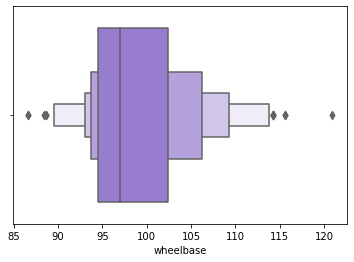

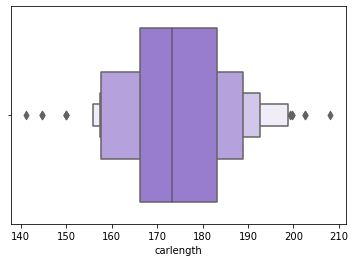

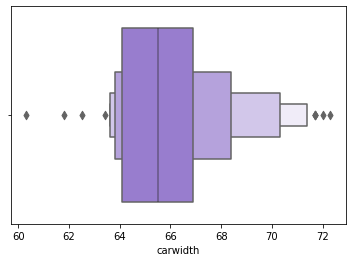

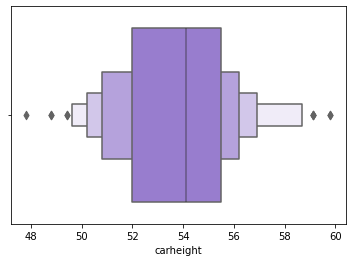

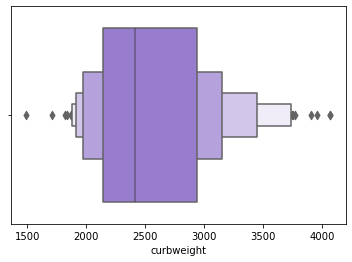

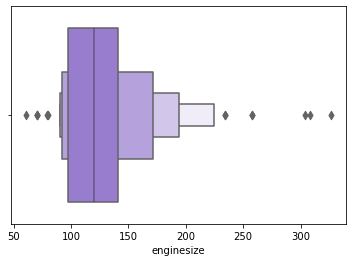

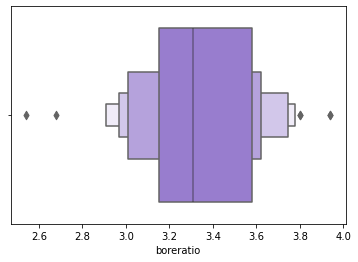

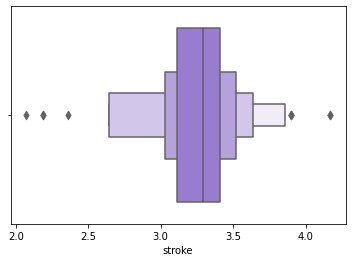

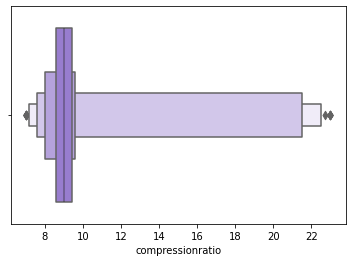

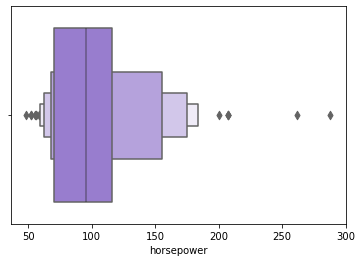

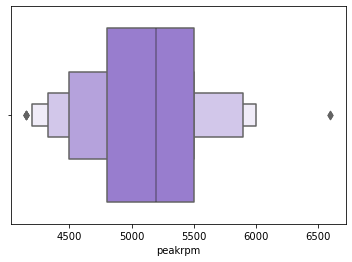

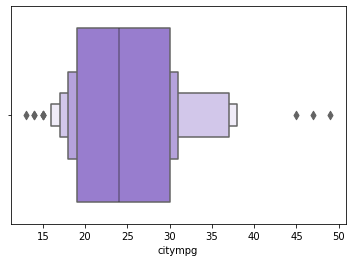

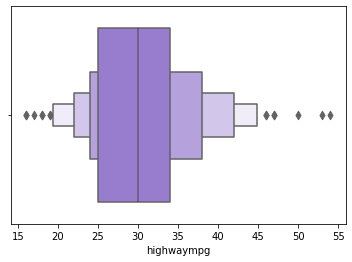

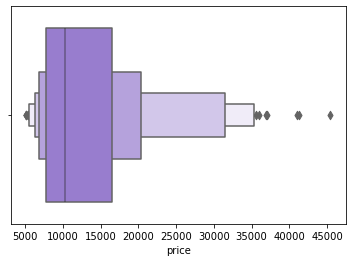

In [224]:
for i in df_num.columns:
    sns.boxenplot(df_num[i], color = 'mediumpurple')
    plt.show()

##### Analyzing the distribution of numerical features

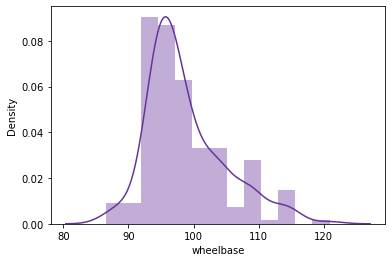

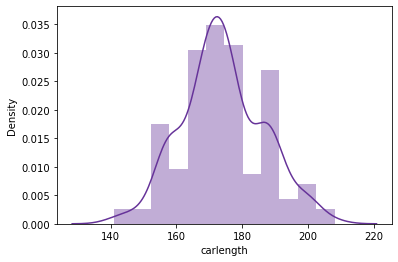

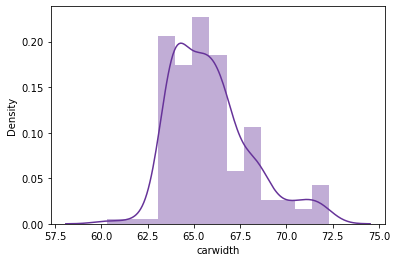

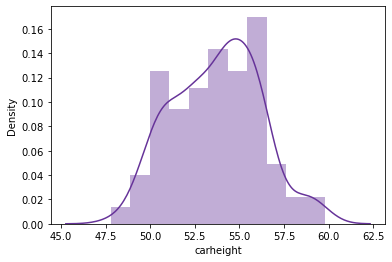

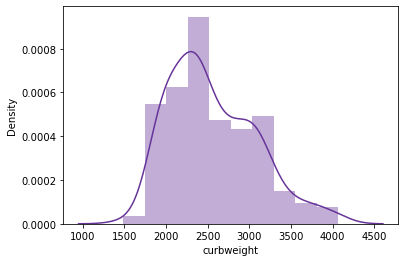

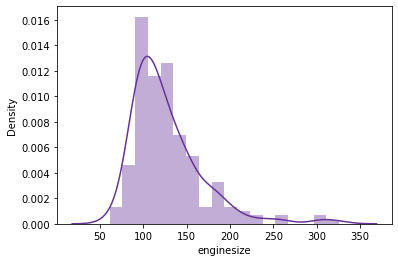

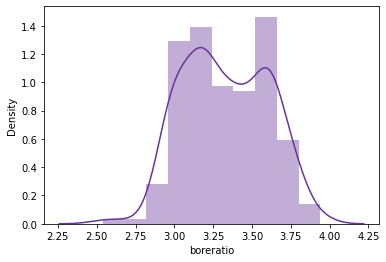

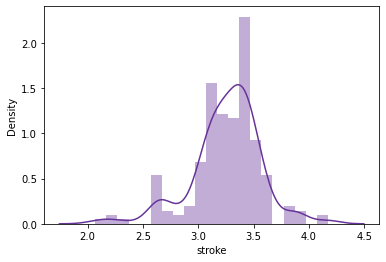

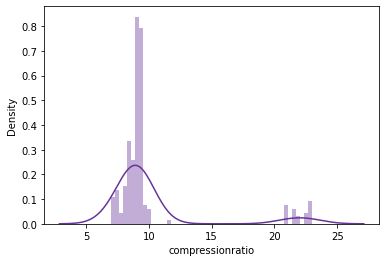

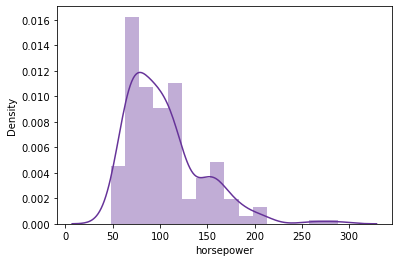

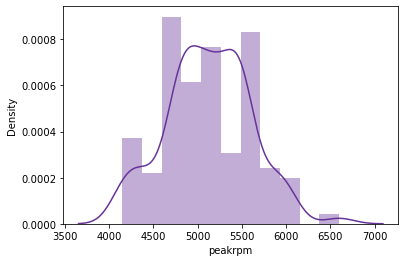

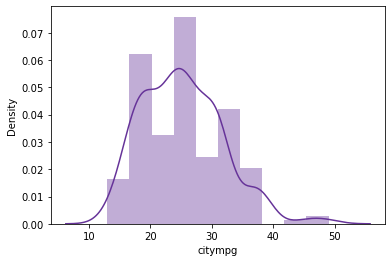

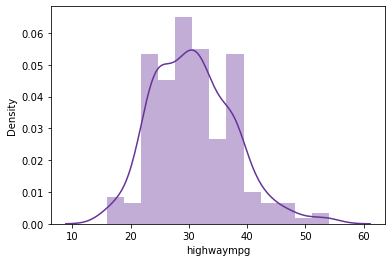

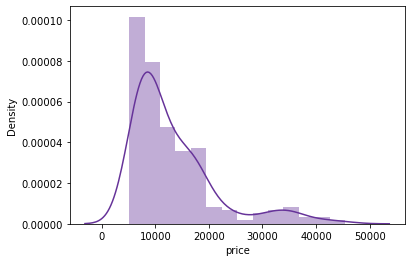

In [225]:
for i in df_num.columns:
    sns.distplot(df_num[i], color = 'rebeccapurple')
    plt.show()

In [226]:
df_cat = df.select_dtypes(include = 'object')
df_cat.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [227]:
df_cat.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

# Univariate Analysis

<AxesSubplot:>

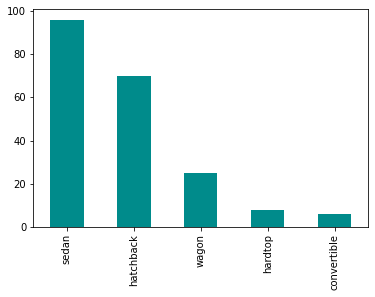

In [228]:
df_cat['carbody'].value_counts().plot(kind='bar', color = 'darkcyan')

Text(0.5, 1.0, 'Distribution of Drive wheel')

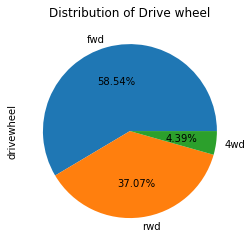

In [229]:
df['drivewheel'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Distribution of Drive wheel')

Text(0.5, 1.0, 'Fuel System')

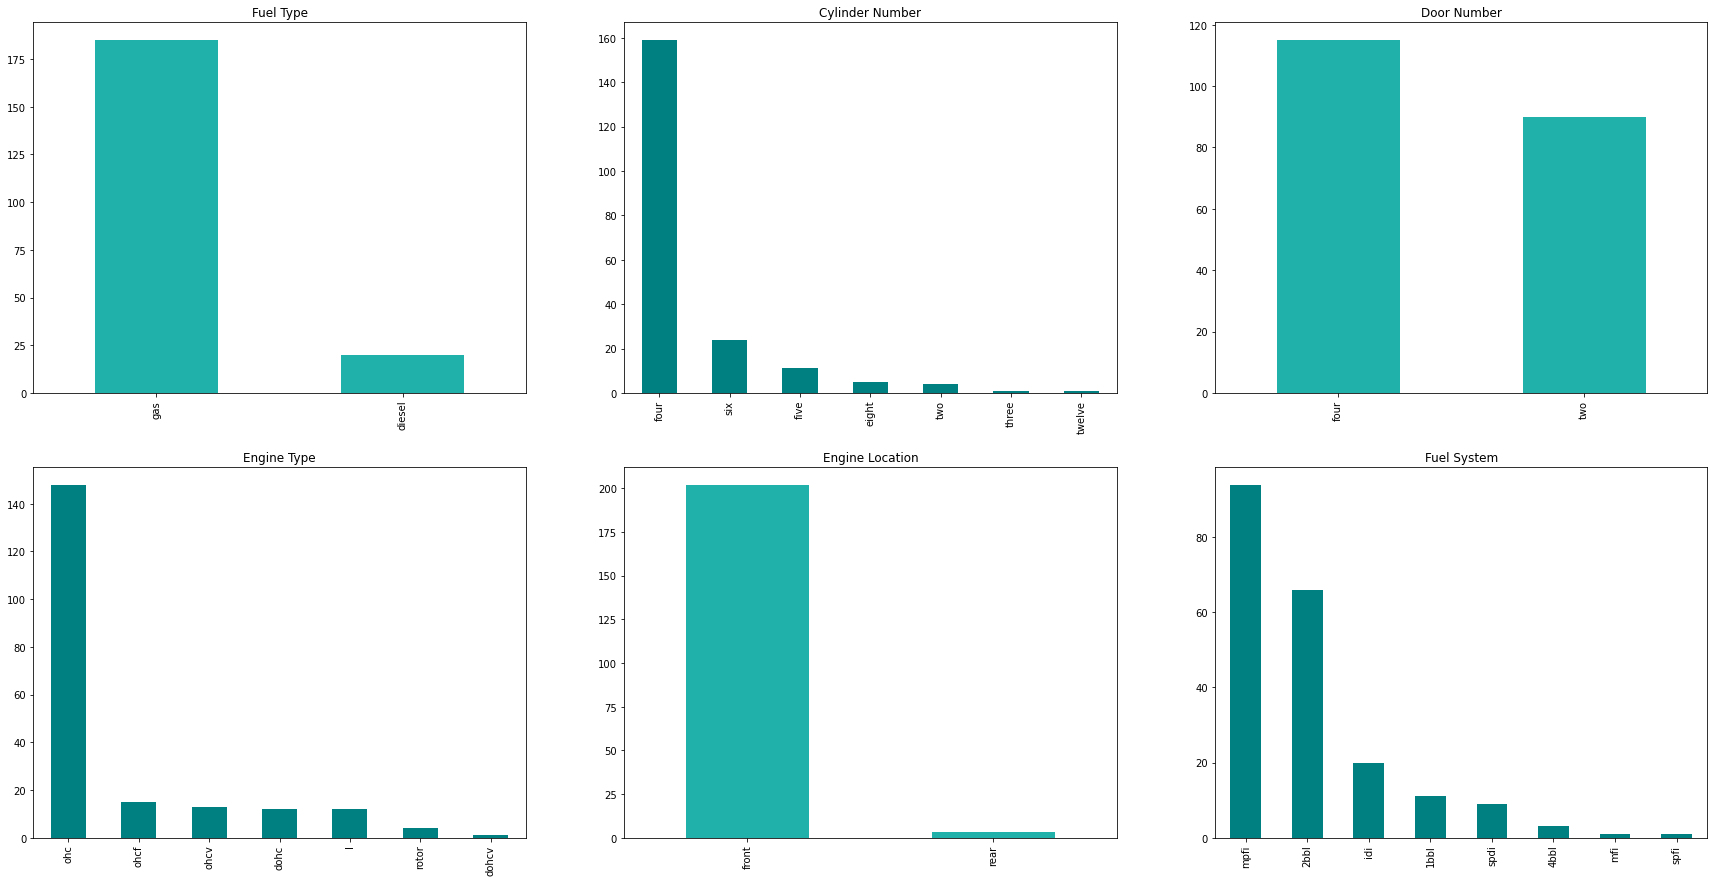

In [230]:
plt.figure(figsize = (30,15))


plt.subplot(2,3,1)
df_cat['fueltype'].value_counts().plot(kind='bar', color = 'lightseagreen')
plt.title('Fuel Type')

plt.subplot(2,3,2)
df_cat['cylindernumber'].value_counts().plot(kind='bar', color = 'teal')
plt.title('Cylinder Number')

plt.subplot(2,3,3)
df_cat['doornumber'].value_counts().plot(kind='bar', color = 'lightseagreen')
plt.title('Door Number')

plt.subplot(2,3,4)
df_cat['enginetype'].value_counts().plot(kind='bar', color = 'teal')
plt.title('Engine Type')

plt.subplot(2,3,5)
df_cat['enginelocation'].value_counts().plot(kind='bar', color = 'lightseagreen')
plt.title('Engine Location')

plt.subplot(2,3,6)
df_cat['fuelsystem'].value_counts().plot(kind='bar', color = 'teal')
plt.title('Fuel System')

In [231]:
pd.crosstab(df['carbody'],df['fueltype'])

fueltype,diesel,gas
carbody,,
convertible,0,6
hardtop,1,7
hatchback,1,69
sedan,15,81
wagon,3,22


Text(0.5, 1.0, 'Movement of Car Prices')

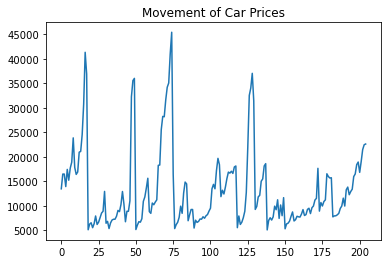

In [232]:
plt.plot(df['price'])
plt.title('Movement of Car Prices')

# Bivariate Analysis

Text(0.5, 1.0, 'Relationship of Car Body with horsepower')

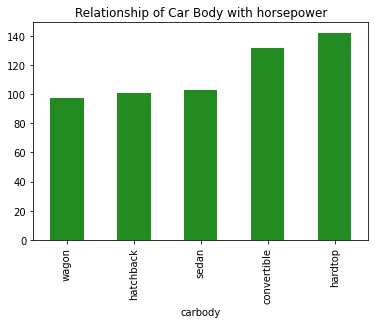

In [233]:
df.groupby(['carbody'])['horsepower'].mean().sort_values().plot(kind='bar', color = 'forestgreen')
plt.title('Relationship of Car Body with horsepower')

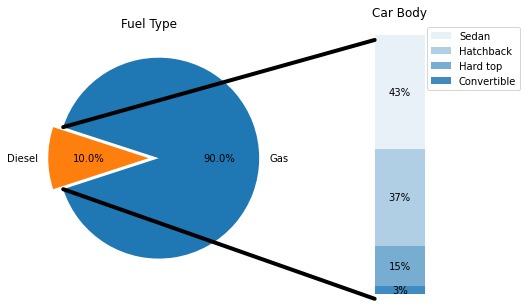

In [234]:
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters

overall_ratios = [.90, .10]
labels = ['Gas', 'Diesel']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.032, .15, .37, .43]
age_labels = ['Convertible', 'Hard top', 'Hatchback', 'Sedan']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax1.set_title('Fuel Type')
ax2.set_title('Car Body')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()


In [235]:
df_cat['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

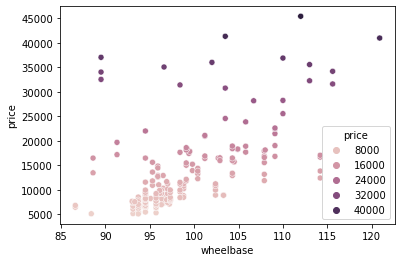

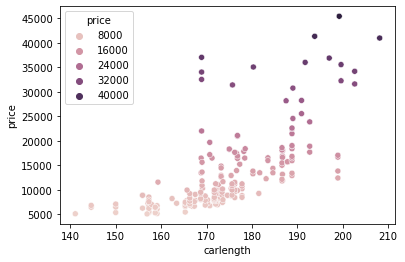

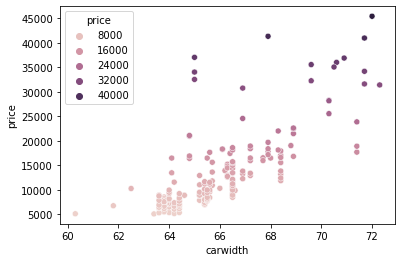

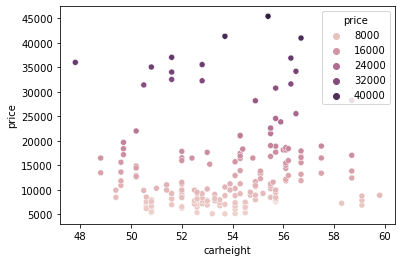

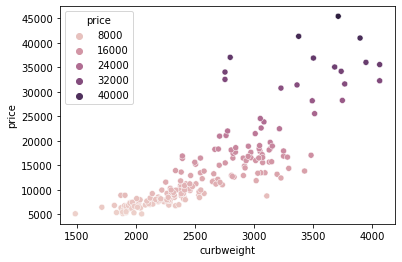

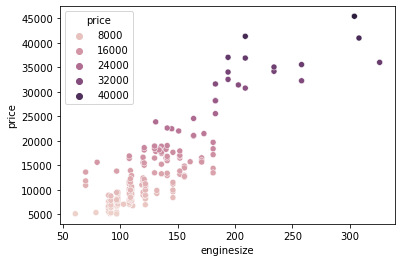

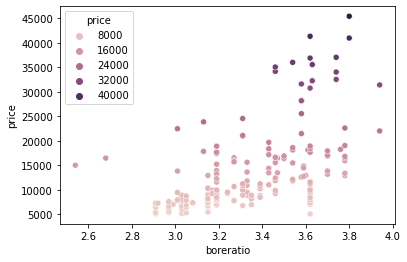

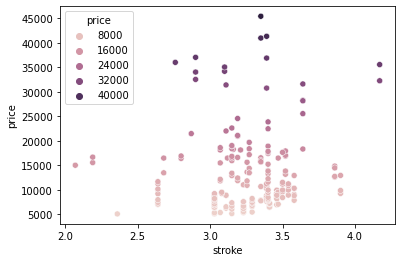

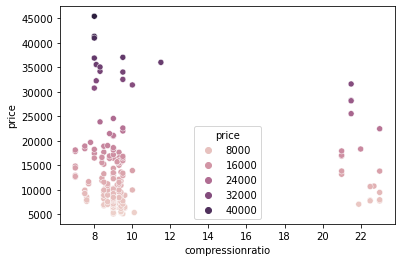

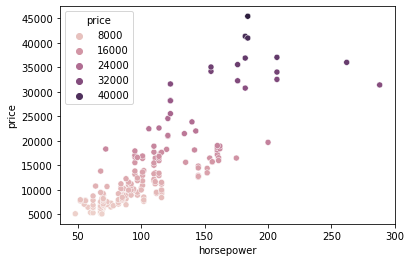

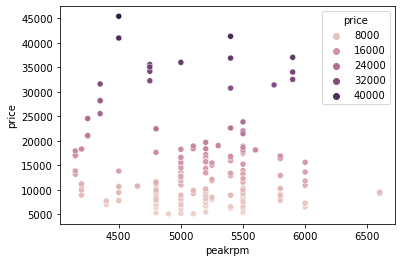

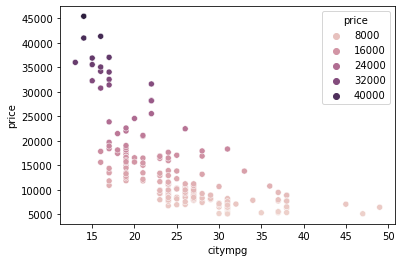

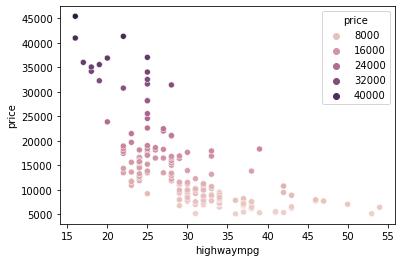

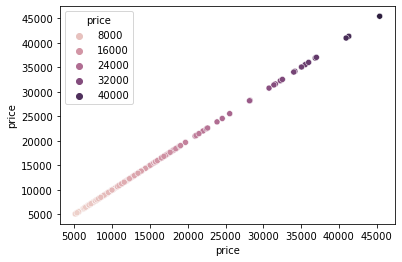

In [236]:
for i in df_num.columns:
    sns.scatterplot(df_num[i],df['price'],hue=df['price'])
    plt.show()

<AxesSubplot:>

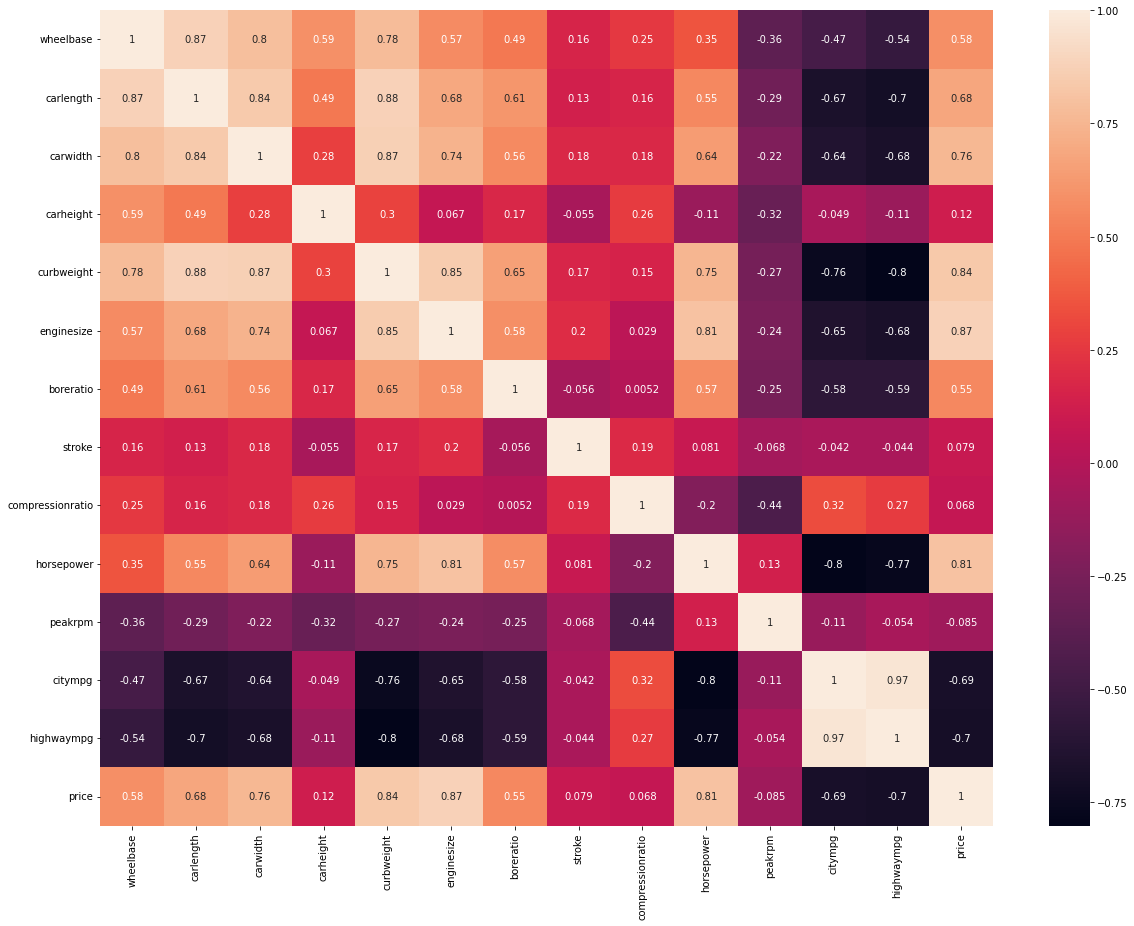

In [237]:
plt.figure(figsize=(20,15))
sns.heatmap(df_num.corr(),annot=True)

##### Encoding categorical variables (df_cat)

In [238]:
df_cat.shape

(205, 11)

In [239]:
df_cat = df_cat.drop(['CarName'], axis=1)

In [240]:
df_encoded_cat = pd.get_dummies(df_cat, drop_first=True)
df_encoded_cat.shape

(205, 34)

##### Scaling the numerical features

In [241]:
df_num = df_num.drop('price',axis=1)

In [242]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaled_num = pd.DataFrame(ss.fit_transform(df_num), columns=df_num.columns)
df_scaled_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900


In [243]:
df_scaled_num.shape

(205, 13)

In [244]:
df_final = pd.concat([df_encoded_cat, df_scaled_num], axis = 1)

In [245]:
df_final.head()

,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0,0,0,0,1,1,0,1,0,0,...,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
1,0,0,0,0,1,1,0,1,0,0,...,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,0,0,1,0,0,1,0,1,0,1,...,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
3,0,0,0,1,0,1,0,0,0,0,...,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
4,0,0,0,1,0,1,0,0,0,0,...,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900


In [246]:
df_final.shape

(205, 47)

##### Model Building

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [248]:
X = df_final
y = df['price']

In [249]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.10, random_state=10)

In [250]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(Xtrain,ytrain)
ypred = LR.predict(Xtest)
print('MSE', metrics.mean_squared_error(ytest,ypred))
print('r2_score', metrics.r2_score(ytest,ypred))

MSE 13982267.448275104
r2_score 0.7535157287396832


In [251]:
# Determining the optimal Alpha value for Lasso Regression

from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(Xtrain, ytrain)

print('The train score on Lasso model is :', lasso_cv.score(Xtrain, ytrain))
print('The test score on Lasso model is :', lasso_cv.score(Xtest, ytest))

The train score on Lasso model is : 0.9396138554845226
The test score on Lasso model is : 0.6692951390936747


In [252]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.8)
lasso.fit(Xtrain,ytrain)
ypred = lasso.predict(Xtest)
print('MSE',metrics.mean_squared_error(ytest,ypred))
print('r2_score',metrics.r2_score(ytest,ypred))

MSE 14995826.912680356
r2_score 0.7356483501555506


In [253]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=6)
ridge.fit(Xtrain,ytrain)
ypred = ridge.predict(Xtest)
print('MSE',metrics.mean_squared_error(ytest,ypred))
print('r2_score',metrics.r2_score(ytest,ypred))

MSE 12731310.456302196
r2_score 0.7755680334667308


In [254]:
# Determining the optimal Alpha value for Ridge Regression

from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(Xtrain, ytrain)

print("The train score for Ridge model is {}".format(ridge_cv.score(Xtrain, ytrain)))
print("The test score for Ridge model is {}".format(ridge_cv.score(Xtest, ytest)))

The train score for Ridge model is 0.9433591726397509
The test score for Ridge model is 0.7401688676542032


##### Inferences from the above models